### 1. Lectura de los datos

In [1]:
import pandas as pd
import numpy as np
from facebook_scraper import get_posts

import re

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [2]:
#Captura de texto: Colectividad De Colombianos Residentes En Antofagasta, página de facebook

Pag=[]

for post in get_posts('ColombianosAfta', pages=20):
    Pag.append(post)

post = pd.DataFrame(Pag)
post

,post_id,text,post_text,shared_text,time,image,image_lowquality,images,images_description,images_lowquality,...,factcheck,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,available,comments_full,reactors,w3_fb_url
0,1772223852949982,Cronograma de manifestaciones pacíficas en el ...,Cronograma de manifestaciones pacíficas en el ...,AGENDANORTE.CL\nEl norte se moviliza por Colombia,2021-05-06 13:51:05,None,https://external.fbog2-5.fna.fbcdn.net/safe_im...,[],[],[https://external.fbog2-5.fna.fbcdn.net/safe_i...,...,None,None,NaT,None,None,None,True,None,None,None
1,1772187096286991,#Antofagasta #soscolombia #NosEstanMantando,#Antofagasta #soscolombia #NosEstanMantando,,2021-05-06 12:56:05,https://scontent.fbog2-5.fna.fbcdn.net/v/t1.64...,https://scontent.fbog2-5.fna.fbcdn.net/v/t1.64...,[https://scontent.fbog2-5.fna.fbcdn.net/v/t1.6...,"[May be an image of one or more people, people...",[https://scontent.fbog2-5.fna.fbcdn.net/v/t1.6...,...,None,None,NaT,None,None,None,True,None,None,None
2,1772054282966939,Londres #soscolombia #nosestanmatando #Colombi...,Londres #soscolombia #nosestanmatando #Colombi...,Janeth Piedrahita\nYesterday at 7:24 PM ·\n\nD...,2021-05-06 09:02:32,None,None,[],[],[],...,None,1763712057122883,2021-05-06 19:24:00,100004523164775,Janeth Piedrahita,https://facebook.com/story.php?story_fbid=1763...,True,None,None,None
3,1771810186324682,#Tocopilla este viernes 7 de mayo 20:30 Plazol...,#Tocopilla este viernes 7 de mayo 20:30 Plazol...,,2021-05-06 00:42:24,https://scontent.fbog2-5.fna.fbcdn.net/v/t1.64...,https://scontent.fbog2-5.fna.fbcdn.net/v/t1.64...,[https://scontent.fbog2-5.fna.fbcdn.net/v/t1.6...,[May be an image of one or more people and tex...,[https://scontent.fbog2-5.fna.fbcdn.net/v/t1.6...,...,None,None,NaT,None,None,None,True,None,None,None
4,1771801816325519,La dictadura con la que quieren someter al pue...,La dictadura con la que quieren someter al pue...,,2021-05-06 00:24:05,https://scontent.fbog2-3.fna.fbcdn.net/v/t1.64...,https://scontent.fbog2-3.fna.fbcdn.net/v/t1.64...,[https://scontent.fbog2-3.fna.fbcdn.net/v/t1.6...,[May be an image of text that says 'EL TIEMPO ...,[https://scontent.fbog2-3.fna.fbcdn.net/v/t1.6...,...,None,None,NaT,None,None,None,True,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,419951532416386,Festival internacional de gastronomía Bahía In...,Festival internacional de gastronomía Bahía In...,,2021-02-11 19:11:23,None,None,[],[],[],...,None,None,NaT,None,None,None,True,None,None,None
74,945306436278049,"Taller de Contabilidad para emprendedores, gra...","Taller de Contabilidad para emprendedores, gra...",,2021-02-10 07:58:37,None,None,[],[],[],...,None,None,NaT,None,None,None,True,None,None,None
75,273562047485076,Todo lo que debes saber sobre el #EstatutoTemp...,Todo lo que debes saber sobre el #EstatutoTemp...,,2021-02-09 10:31:07,None,None,[],[],[],...,None,None,NaT,None,None,None,True,None,None,None
76,1708939042611797,La Colectividad de Colombianos Residentes en A...,La Colectividad de Colombianos Residentes en A...,,2021-02-07 15:05:34,None,None,[],[],[],...,None,None,NaT,None,None,None,True,None,None,None


### 2. Pre-procesamiento

In [3]:
post.text

0     Cronograma de manifestaciones pacíficas en el ...
1           #Antofagasta #soscolombia #NosEstanMantando
2     Londres #soscolombia #nosestanmatando #Colombi...
3     #Tocopilla este viernes 7 de mayo 20:30 Plazol...
4     La dictadura con la que quieren someter al pue...
                            ...                        
73    Festival internacional de gastronomía Bahía In...
74    Taller de Contabilidad para emprendedores, gra...
75    Todo lo que debes saber sobre el #EstatutoTemp...
76    La Colectividad de Colombianos Residentes en A...
77    La Colectividad de Colombianos Residentes en A...
Name: text, Length: 78, dtype: object

In [4]:
palabras = post.text.str.cat(sep=" ")
stopwords.extend(["https", "#", "cl", "co", "gov", "com", ".", "am", "pm", "at", "www", "hoy",
                  "Colombia", "Antofagasta", "Chile", "migrante", "migrantes", "colombianos"])

In [5]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

post['pp'] = post.text.apply(lambda texto: pre_procesado(texto))
post.head()

,post_id,text,post_text,shared_text,time,image,image_lowquality,images,images_description,images_lowquality,...,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,available,comments_full,reactors,w3_fb_url,pp
0,1772223852949982,Cronograma de manifestaciones pacíficas en el ...,Cronograma de manifestaciones pacíficas en el ...,AGENDANORTE.CL\nEl norte se moviliza por Colombia,2021-05-06 13:51:05,None,https://external.fbog2-5.fna.fbcdn.net/safe_im...,[],[],[https://external.fbog2-5.fna.fbcdn.net/safe_i...,...,None,NaT,None,None,None,True,None,None,None,cronograma manifestaciones pacíficas norte sos...
1,1772187096286991,#Antofagasta #soscolombia #NosEstanMantando,#Antofagasta #soscolombia #NosEstanMantando,,2021-05-06 12:56:05,https://scontent.fbog2-5.fna.fbcdn.net/v/t1.64...,https://scontent.fbog2-5.fna.fbcdn.net/v/t1.64...,[https://scontent.fbog2-5.fna.fbcdn.net/v/t1.6...,"[May be an image of one or more people, people...",[https://scontent.fbog2-5.fna.fbcdn.net/v/t1.6...,...,None,NaT,None,None,None,True,None,None,None,antofagasta soscolombia nosestanmantando
2,1772054282966939,Londres #soscolombia #nosestanmatando #Colombi...,Londres #soscolombia #nosestanmatando #Colombi...,Janeth Piedrahita\nYesterday at 7:24 PM ·\n\nD...,2021-05-06 09:02:32,None,None,[],[],[],...,1763712057122883,2021-05-06 19:24:00,100004523164775,Janeth Piedrahita,https://facebook.com/story.php?story_fbid=1763...,True,None,None,None,londres soscolombia nosestanmatando colombiaen...
3,1771810186324682,#Tocopilla este viernes 7 de mayo 20:30 Plazol...,#Tocopilla este viernes 7 de mayo 20:30 Plazol...,,2021-05-06 00:42:24,https://scontent.fbog2-5.fna.fbcdn.net/v/t1.64...,https://scontent.fbog2-5.fna.fbcdn.net/v/t1.64...,[https://scontent.fbog2-5.fna.fbcdn.net/v/t1.6...,[May be an image of one or more people and tex...,[https://scontent.fbog2-5.fna.fbcdn.net/v/t1.6...,...,None,NaT,None,None,None,True,None,None,None,tocopilla viernes mayo plazoleta alexis sánchez
4,1771801816325519,La dictadura con la que quieren someter al pue...,La dictadura con la que quieren someter al pue...,,2021-05-06 00:24:05,https://scontent.fbog2-3.fna.fbcdn.net/v/t1.64...,https://scontent.fbog2-3.fna.fbcdn.net/v/t1.64...,[https://scontent.fbog2-3.fna.fbcdn.net/v/t1.6...,[May be an image of text that says 'EL TIEMPO ...,[https://scontent.fbog2-3.fna.fbcdn.net/v/t1.6...,...,None,NaT,None,None,None,True,None,None,None,dictadura quieren someter pueblo colombiano no...


### 3. Nube de palabras

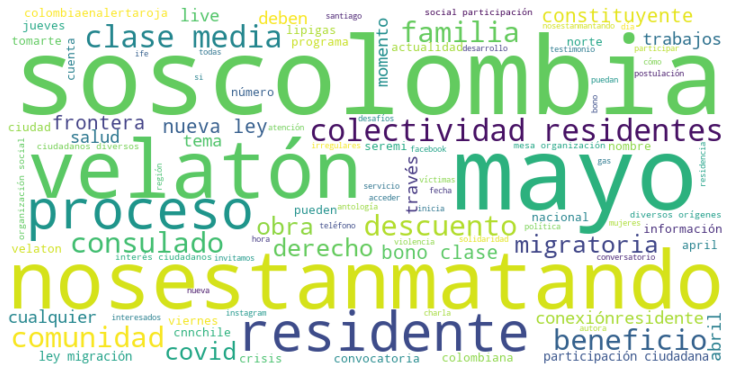

In [6]:
palabras = post.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="viridis",
                      stopwords=stopwords).generate(palabras)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()